# HRF Mark 2.2

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hrf = cv2.imread('/Users/teguhsatya/Dev/segeralulus/samples/s_hrf.jpg')
hrf_rgb = cv2.cvtColor(hrf, cv2.COLOR_BGR2RGB)
hrf_res = cv2.resize(hrf_rgb, (int(hrf_rgb.shape[1]*50/100), int(hrf_rgb.shape[0]*50/100)), cv2.INTER_AREA)
wlim = 135
hrfg = cv2.cvtColor(hrf_res, cv2.COLOR_RGB2GRAY)
xmax = cv2.minMaxLoc(hrfg)[3][0]
ymax = cv2.minMaxLoc(hrfg)[3][1]
roi = hrf_res.copy()[ymax-wlim:ymax+wlim,xmax-wlim:xmax+wlim]

In [3]:
def adjust_gamma(image, gamma=1.0):
    table = np.array([((i / 255.0) ** gamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)

In [4]:
green = roi[:,:,1].copy()

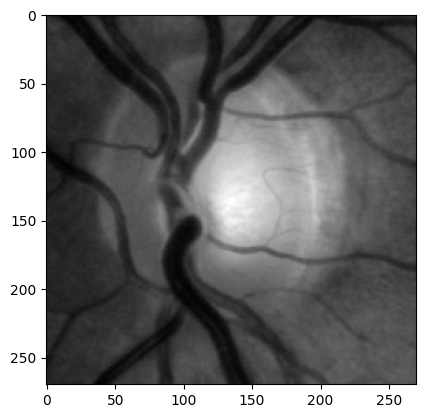

In [7]:
plt.imshow(green, cmap='gray')

In [84]:
green_i = 255-green.copy()

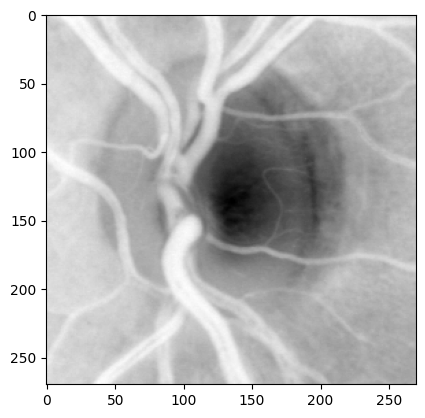

In [86]:
plt.imshow(green_i, cmap='gray')

In [87]:
gmc = adjust_gamma(green_i, 5.0)

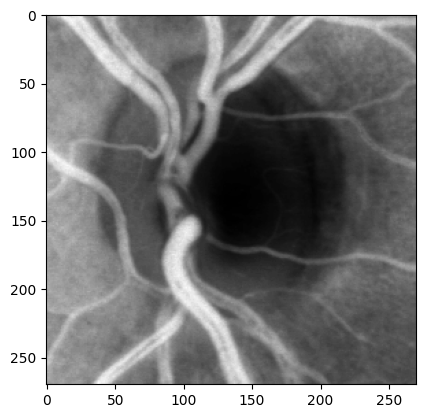

In [89]:
plt.imshow(gmc, cmap='gray')

In [90]:
ret, th = cv2.threshold(gmc.copy(),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

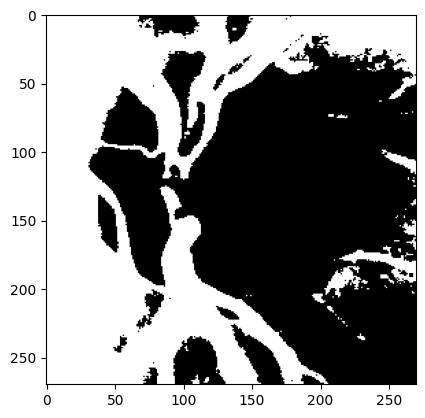

In [92]:
plt.imshow(th, cmap='gray')

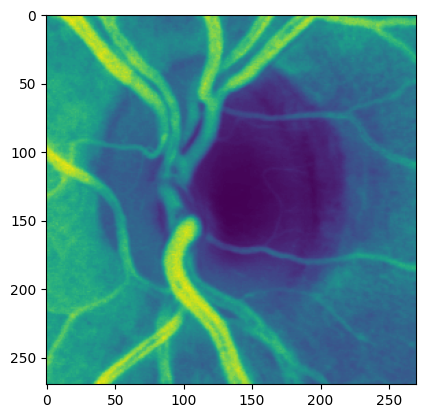

In [93]:
plt.imshow(gmc)

In [94]:
clahe = cv2.createCLAHE(5, (8,8))
gmclahe = clahe.apply(gmc.copy())

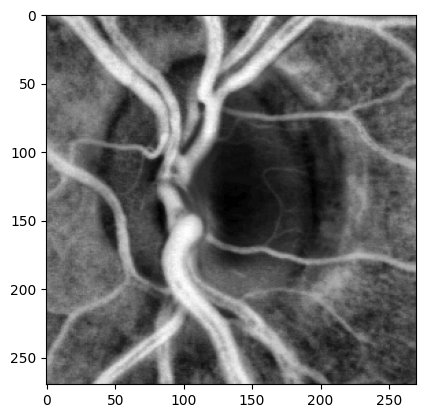

In [96]:
plt.imshow(gmclahe, cmap='gray')

In [97]:
ret2, th2 = cv2.threshold(gmclahe.copy(),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

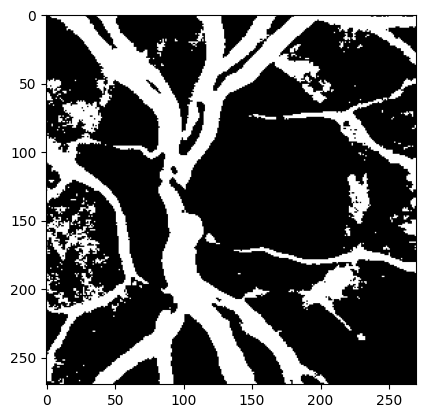

In [110]:
plt.imshow(th2, 'gray')

In [143]:
blur = cv2.blur(th2.copy(), (3,3))

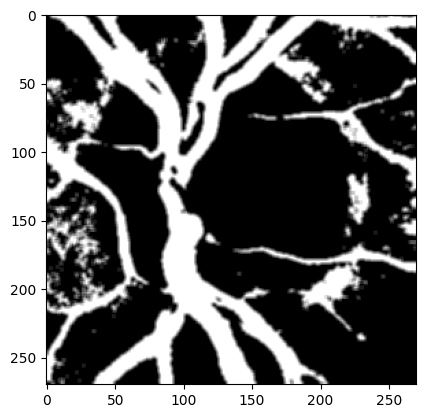

In [144]:
plt.imshow(blur, 'gray')

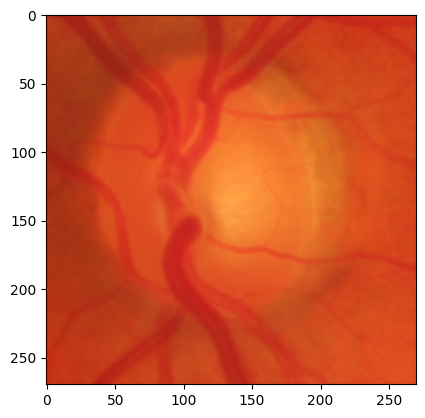

In [145]:
plt.imshow(roi)

In [146]:
dst = cv2.inpaint(roi.copy(),th2.copy(),3,cv2.INPAINT_TELEA)

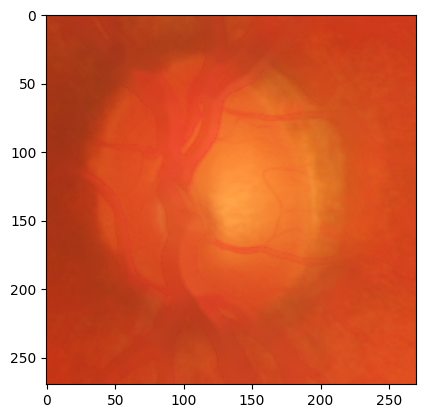

In [148]:
plt.imshow(dst)

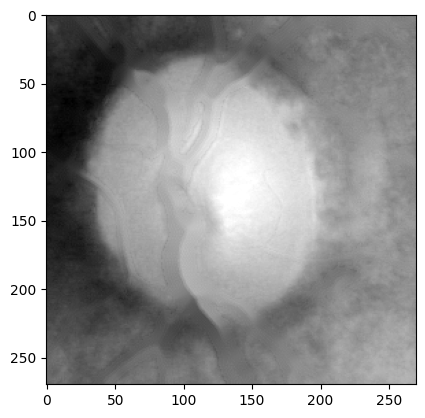

In [154]:
plt.imshow(dst[:,:,0], 'gray')

In [155]:
new_red = dst[:,:,0]

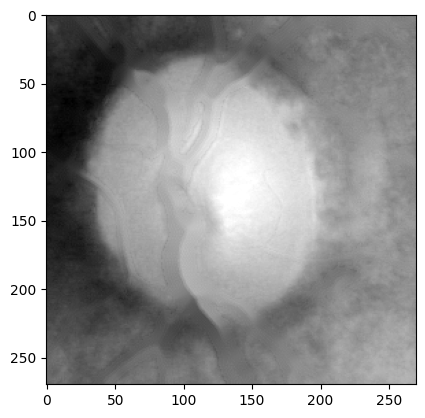

In [156]:
plt.imshow(new_red, 'gray')

In [157]:
gmcn = adjust_gamma(new_red.copy(), 5.0)

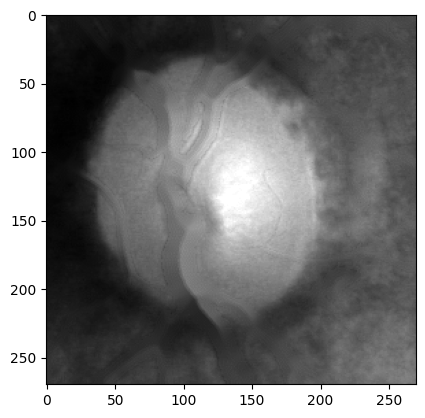

In [159]:
plt.imshow(gmcn, 'gray')

In [162]:
blur = cv2.GaussianBlur(gmcn, (19,19), 0)

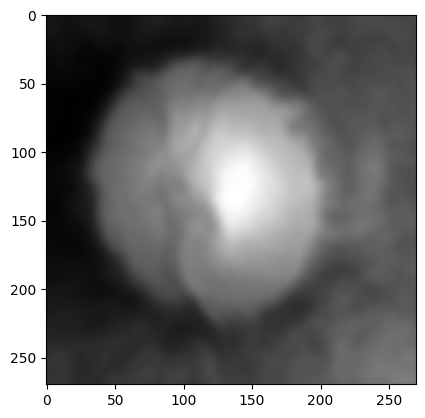

In [163]:
plt.imshow(blur, 'gray')

In [171]:
ret3, th3 = cv2.threshold(blur.copy(),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

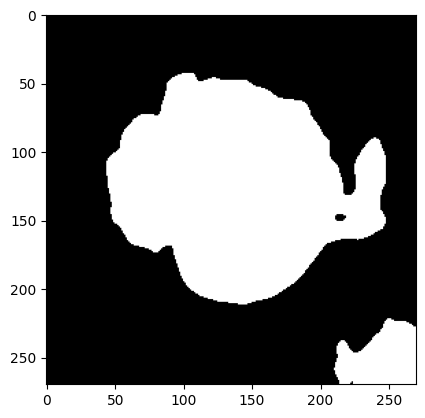

In [191]:
plt.imshow(th3, 'gray')

In [195]:
cont, hcy = cv2.findContours(th3.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for con in cont:
    print(con.shape)

(57, 1, 2)
(296, 1, 2)
(10, 1, 2)


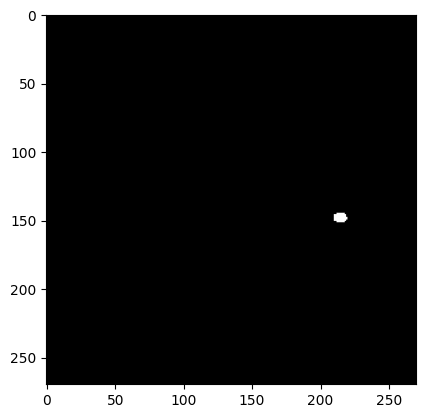

In [170]:
thhh = th3.copy()
roic = roi.copy()
for contour in cont:
    ellipse = cv2.fitEllipse(contour)
    od = np.zeros_like(thhh, dtype='uint8')
    cv2.ellipse(od, ellipse, (255, 255, 255), -1)
    cv2.ellipse(roic, ellipse, (0, 255, 0), 1, cv2.LINE_AA)
    plt.imshow(od, 'gray')

In [179]:
clahe = cv2.createCLAHE(2, (8,8))
gmcn_clahe = clahe.apply(gmcn.copy())

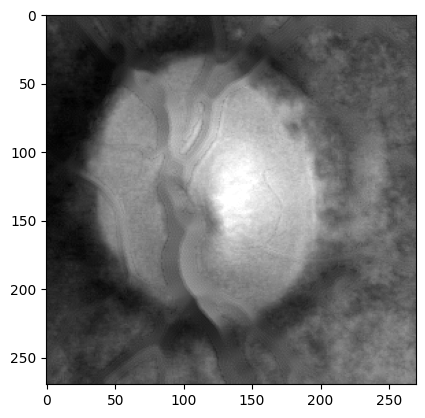

In [180]:
plt.imshow(gmcn_clahe, 'gray')

In [182]:
blur = cv2.GaussianBlur(gmcn_clahe.copy(), (19,19), 0)

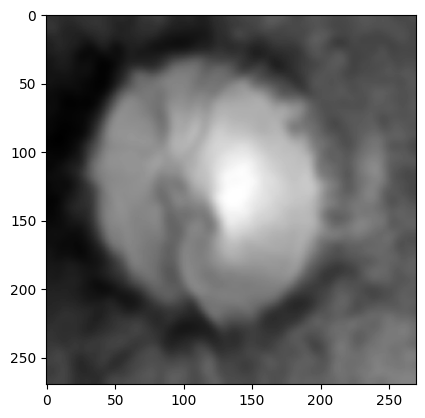

In [185]:
plt.imshow(blur, 'gray')

In [186]:
dilate = cv2.dilate(blur.copy(), kernel=np.ones((15,15), np.uint8))

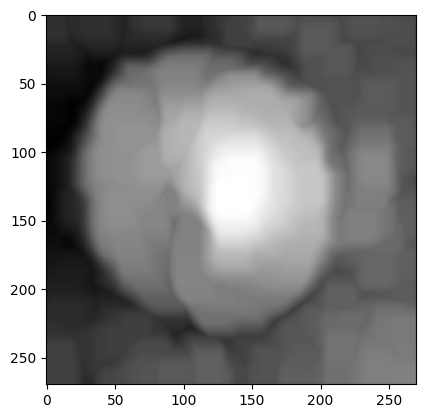

In [188]:
plt.imshow(dilate, 'gray')

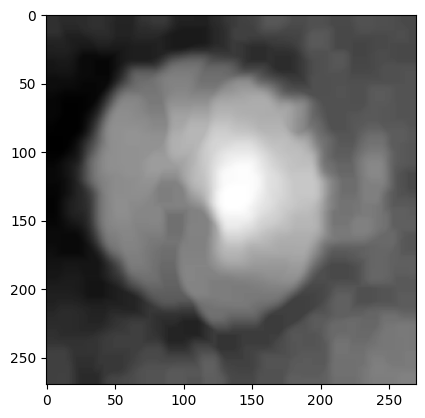

In [189]:
erosion = cv2.erode(dilate.copy(), kernel=np.ones((10,10), np.uint8))
plt.imshow(erosion, 'gray')

In [197]:
ret4, th4 = cv2.threshold(erosion.copy(),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

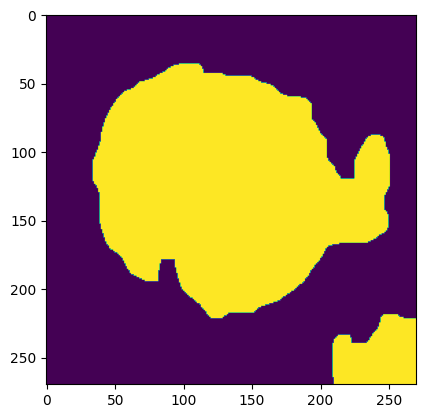

In [198]:
plt.imshow(th4)

In [199]:
cont, hcy = cv2.findContours(th4.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [207]:
for con in cont:
    print(con.shape, type(con))

(30, 1, 2) <class 'numpy.ndarray'>
(289, 1, 2) <class 'numpy.ndarray'>


In [208]:
print(cont[1].shape)

(289, 1, 2)


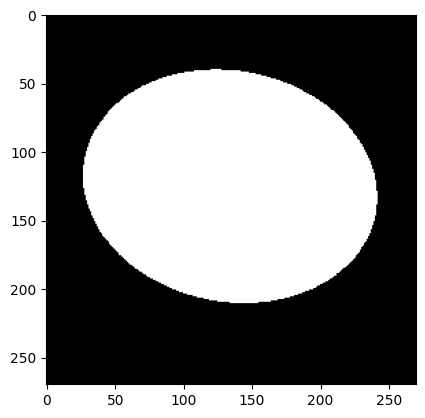

In [209]:
hhh = th4.copy()
roic = roi.copy()
ellipse = cv2.fitEllipse(cont[1])
od = np.zeros_like(thhh, dtype='uint8')
cv2.ellipse(od, ellipse, (255, 255, 255), -1)
cv2.ellipse(roic, ellipse, (0, 255, 0), 1, cv2.LINE_AA)
plt.imshow(od, 'gray')  

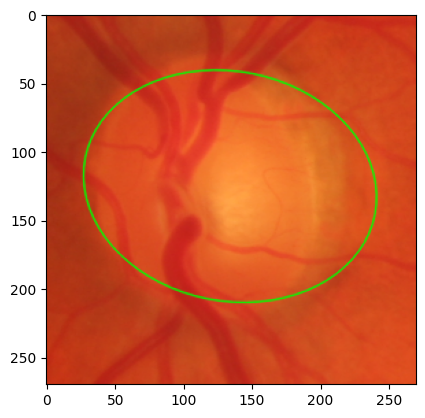

In [210]:
plt.imshow(roic)